In [1]:
# Importar librerias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importar tabla
agua_embalsada = pd.read_csv("csv/Agua_embalsada.csv",
                             sep=";")

# Eliminar columnas que no son relavantes
agua_embalsada.drop(["Unnamed: 0", "Semana"], axis='columns', inplace=True)

print(agua_embalsada.head())

agua_embalsada.info()

   Agua embalsada       Fecha
0           23337  1988-03-01
1           23555  1988-10-01
2           24334  1988-01-17
3           25230  1988-01-24
4           27549  1988-01-31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agua embalsada  1846 non-null   int64 
 1   Fecha           1846 non-null   object
dtypes: int64(1), object(1)
memory usage: 29.0+ KB


In [2]:
# Poner la columna Fecha en formato temporal y convertirla en el índice
agua_embalsada['Fecha'] = pd.to_datetime(agua_embalsada['Fecha'], format='%Y/%m/%d')
agua_embalsada = agua_embalsada.set_index('Fecha')
agua_embalsada

,Agua embalsada
Fecha,
1988-03-01,23337
1988-10-01,23555
1988-01-17,24334
1988-01-24,25230
1988-01-31,27549
...,...
2023-04-16,28665
2023-04-23,28074
2023-04-30,27823


<Axes: xlabel='Fecha'>

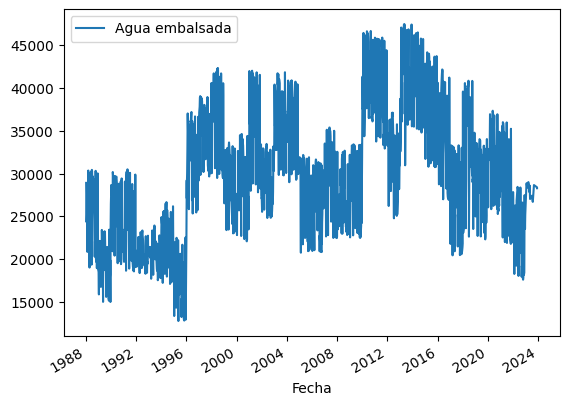

In [3]:
# Pintar la gráfica
agua_embalsada.plot()

In [110]:
# Comprobrar si son estacionarios nuestros datos
from statsmodels.tsa.stattools import adfuller

result = adfuller(agua_embalsada['Agua embalsada']) # Si es mejor al 5% lo será
result # Efectivamente, tiene estacionalidad

(-3.232415597715626,
 0.018183358229782152,
 25,
 1820,
 {'1%': -3.4339481027788024,
  '5%': -2.8631293617920544,
  '10%': -2.5676161227508754},
 27400.090139705004)

In [17]:
# Importar librerias
from pmdarima.arima import ARIMA
from pmdarima import auto_arima

In [34]:
# Separar en train y test
train = agua_embalsada[:1810]
test = agua_embalsada[1810:]
testcopia = test.copy()

In [75]:
# Buscar el mejor arima (PRIMERA PRUEBA)
v_arima = auto_arima(train, seasonal=True, max_p=7, max_d=5, max_q=7, max_P=4, max_D=4, max_Q=4,
                     trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27322.010, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28723.166, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27349.376, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27863.079, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28721.178, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27320.320, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=27593.827, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27334.049, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27321.904, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=27490.121, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27323.873, Time=0.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=27253.716, Time=2.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.76 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=27223.514, Time=2.92 sec
 ARIMA(1,1,4)(0,0,0)[0] i

In [83]:
# Buscar el mejor arima (SEGUNDA PRUEBA)
v_arima = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12,start_P=0, d=1, D=1,
                     seasonal=True, trace=True,error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=29777.184, Time=1.15 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=27940.685, Time=4.64 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=28353.339, Time=0.31 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=27743.380, Time=7.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=35.71 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=7.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=29299.241, Time=5.18 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=27727.572, Time=14.76 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=27920.565, Time=4.46 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=16.51 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.82 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=27712.330, Time=11.16 sec
 ARIMA(3,1,0)(1,1,0)[12]             

In [85]:
# Nos quedamso con el Arima de la segunda prueba
arima_model = ARIMA(order=(1,1,2), seasonal_order=(2,1,0,12))
arima_result = arima_model.fit(train) # Entrenamos el modelo
arima_result.summary() # Mostramos el resumen del entrenamiento

c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monoto

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1810
Model:             SARIMAX(1, 1, 2)x(2, 1, [], 12)   Log Likelihood              -13848.231
Date:                             Fri, 19 May 2023   AIC                          27710.461
Time:                                     11:10:34   BIC                          27748.918
Sample:                                          0   HQIC                         27724.658
                                            - 1810                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7091      9.610      0.074      0.941     -18.125      19.543
ar.L1          0.8731      0.016     54.565      0.000       0.842       0.904
ma.L1         -0.1978      0.021     -9.345      0.000      -0.239      -0.156
ma.L2         -0.1008      0.022     -4.634      0.000      -0.143      -0.058
ar.S.L12      -0.6085      0.015    -39.706      0.000      -0.639      -0.578
ar.S.L24      -0.3115      0.016    -19.419      0.000      -0.343      -0.280
sigma2      2.763e+05   5093.769     54.250      0.000    2.66e+05    2.86e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):              3554.67
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             1.19
Prob(H) (two-sided):                  0.11   Kurtosis:                         9.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
# Predecimos 
arima_pred = arima_result.predict(len(testcopia), typ="levels").rename("ARIMA Predictions")
arima_pred

c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1810    19755.724148
1811    19616.042217
1812    19291.569106
1813    18998.487596
1814    18622.157739
1815    18246.186828
1816    17885.552747
1817    17355.317171
1818    16881.543460
1819    16363.455014
1820    15904.153262
1821    15542.223465
1822    15302.324972
1823    15326.242282
1824    15100.442641
1825    14839.712012
1826    14616.727801
1827    14420.078666
1828    14190.774059
1829    13728.723147
1830    13264.812280
1831    12769.925827
1832    12306.365941
1833    11891.466601
1834    11520.934604
1835    11290.752638
1836    10951.674128
1837    10591.616732
1838    10224.698108
1839     9827.789024
1840     9398.272936
1841     8799.314704
1842     8260.585952
1843     7693.606611
1844     7193.163381
1845     6760.283425
Name: ARIMA Predictions, dtype: float64

In [88]:
# Creamos una lista con los datos obtenidos de la prediccion
lista = []
for x in arima_pred:
    lista.append(x)

In [54]:
testcopia

,Agua embalsada
Fecha,
2022-11-09,19671
2022-09-18,19209
2022-09-25,18810
2022-02-10,18269
2022-09-10,17944
2022-10-16,17747
2022-10-23,17599
2022-10-30,17819
2022-06-11,18038


<Axes: xlabel='Fecha'>

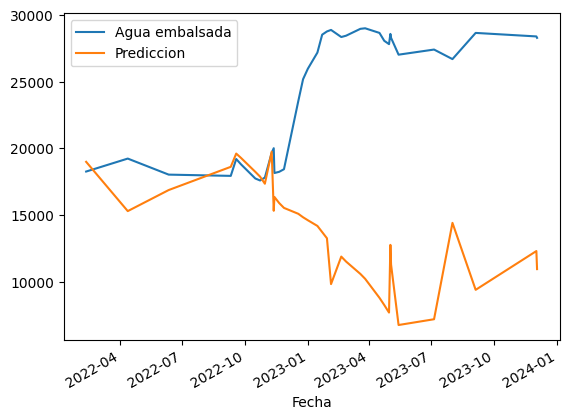

In [89]:
# Agregamos una columna con los datos de la predeccion para comparar posteriormente con los reales
testcopia["Prediccion"]= lista
testcopia.plot() # Pintamos gráfica

APLICAMOS MODELO ARIMA CON FECHAS VACIAS

In [37]:
# Importamos tabla y repetimos el procesado de datos anterior

pred_2024 = pd.read_csv("csv/pred_2024.csv",
                        sep=",")

pred_2024['Fecha'] = pd.to_datetime(pred_2024['Fecha'], format='%Y/%m/%d')
pred_2024 = pred_2024.set_index('Fecha')

pred_2024.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1909 entries, 1988-03-01 to 2024-07-28
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Agua embalsada  1846 non-null   float64
dtypes: float64(1)
memory usage: 29.8 KB


In [38]:
pred_2024[1809:1812]

,Agua embalsada
Fecha,
2022-04-09,20174.0
2022-11-09,19671.0
2022-09-18,19209.0


In [39]:
train = pred_2024[:1810]
test = pred_2024[1810:]
testcopy = test.copy()

In [115]:
arima_model = ARIMA(order=(1,1,2), seasonal_order=(2,1,0,52))
arima_result = arima_model.fit(train)
arima_result.summary()

c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monoto

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1810
Model:             SARIMAX(1, 1, 2)x(2, 1, [], 52)   Log Likelihood              -13447.945
Date:                             Fri, 19 May 2023   AIC                          26909.889
Time:                                     11:44:36   BIC                          26948.189
Sample:                                          0   HQIC                         26924.044
                                            - 1810                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0309     11.515      0.003      0.998     -22.538      22.600
ar.L1          0.6201      0.042     14.914      0.000       0.539       0.702
ma.L1         -0.0823      0.043     -1.893      0.058      -0.167       0.003
ma.L2         -0.0424      0.029     -1.486      0.137      -0.098       0.014
ar.S.L52      -0.6272      0.015    -41.855      0.000      -0.657      -0.598
ar.S.L104     -0.2817      0.015    -19.362      0.000      -0.310      -0.253
sigma2      2.484e+05   3836.648     64.745      0.000    2.41e+05    2.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):              6816.17
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             1.35
Prob(H) (two-sided):                  0.14   Kurtosis:                        12.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
arima_pred = arima_result.predict(len(test)).rename("ARIMA Predictions")
arima_pred

c:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1810    19693.483558
1811    19254.205338
1812    18961.465008
1813    18827.064794
1814    18636.252330
            ...     
1904    22669.651923
1905    21985.479110
1906    21194.813650
1907    20383.702713
1908    19539.421464
Name: ARIMA Predictions, Length: 99, dtype: float64

In [117]:
lista = []
for x in arima_pred:
    lista.append(x)

lista[0:101]

[19693.483557735446,
 19254.205338392294,
 18961.465007528815,
 18827.06479379766,
 18636.25232972897,
 18450.25970357052,
 18676.421026378222,
 18668.644429826578,
 18976.447944066138,
 19414.18773874139,
 19584.94748373882,
 19791.53682841939,
 19869.321348899943,
 20534.77032467671,
 22329.555096358723,
 22799.293234822075,
 22936.51122678782,
 23084.07539961391,
 23083.5094744631,
 23278.69388070167,
 23898.51458260548,
 24505.145793733896,
 24981.201640839485,
 25681.7312851141,
 25888.238245916054,
 26157.808626372753,
 26152.623496180106,
 26310.60837790023,
 26487.007946080346,
 26853.103463231906,
 27078.215526766886,
 27310.49911002739,
 27465.930084082047,
 27704.582252762426,
 27898.0549695851,
 27981.7092907293,
 27999.79710777817,
 27789.820351956718,
 27416.06380536889,
 27147.368819881758,
 26694.897925937028,
 26180.277244676887,
 25667.763206470798,
 24984.330077312858,
 24191.949945929926,
 23365.40176064276,
 22479.783610409933,
 21551.329086038106,
 20887.163843561

CON LA COLUMNA PREDECCION VEREMOS LOS DATOS DE LAS FECHAS FUTURAS

In [118]:
testcopy.head(20)

,Agua embalsada,Prediccion
Fecha,,
2022-11-09,19671.0,19755.724148
2022-09-18,19209.0,19616.042217
2022-09-25,18810.0,19291.569106
2022-02-10,18269.0,18998.487596
2022-09-10,17944.0,18622.157739
2022-10-16,17747.0,18246.186828
2022-10-23,17599.0,17885.552747
2022-10-30,17819.0,17355.317171
2022-06-11,18038.0,16881.543460


In [119]:
testcopy["Prediccion"] = lista
testcopy

,Agua embalsada,Prediccion
Fecha,,
2022-11-09,19671.0,19693.483558
2022-09-18,19209.0,19254.205338
2022-09-25,18810.0,18961.465008
2022-02-10,18269.0,18827.064794
2022-09-10,17944.0,18636.252330
...,...,...
2024-06-30,NaN,22669.651923
2024-07-07,NaN,21985.479110
2024-07-14,NaN,21194.813650


<Axes: xlabel='Fecha'>

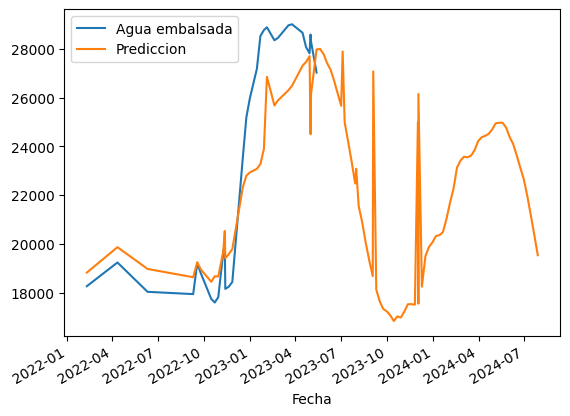

In [120]:
testcopy.plot()

In [121]:
#Salvar modelo

import pickle

model_ST = arima_model = ARIMA(order=(1,1,2), seasonal_order=(2,1,0,52))

with open("model_ST.pkl", "wb") as model_file:
    pickle.dump(model_ST, model_file)